# <center>Drug Classification Model</center>

In [14]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
%matplotlib inline

In [6]:
# Display options
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [7]:
sns.set_style(style="whitegrid")

# Downloading data

This data consists of patient details, that includes the following:
- **Age**
<br>
- **Sex**
<br>
- **BP**, i.e, Blood Pressure
<br>
- **Cholestrol**
<br>
- **Na_to_K**
<br>
- **Drug**

In [8]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-01-17 19:22:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: 'drug200.csv'

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-01-17 19:22:40 (639 MB/s) - 'drug200.csv' saved [6027/6027]



In [11]:
df = pd.read_csv("drug200.csv")
print(df.shape)
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Pre-processing

In [17]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df[['Drug']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [18]:
# Labeling Sex
sex_dummy = preprocessing.LabelEncoder()
sex_dummy.fit(['F', 'M'])
x[:,1] = sex_dummy.transform(x[:,1])

# Labeling BP
BP_dummy = preprocessing.LabelEncoder()
BP_dummy.fit(['LOW', 'NORMAL', 'HIGH'])
x[:, 2] = BP_dummy.transform(x[:,2])

# Labeling Cholestrol

chl_dummy = preprocessing.LabelEncoder()
chl_dummy.fit(['NORMAL', 'HIGH'])
x[:,3] = chl_dummy.transform(x[:,3])

x[0:10]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

In [19]:
y[0:10]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugC'],
       ['drugY'],
       ['drugY']], dtype=object)

# Model Development

## Train and Test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=4)

In [22]:
# data shape
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (140, 5)
X_test:  (60, 5)
y_train:  (140, 1)
y_test:  (60, 1)


## Model-1: DecisionTreeClassifier

In [23]:
drugTree= DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction

In [25]:
yhat1 = drugTree.predict(X_test)
yhat1

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugX', 'drugA', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugC', 'drugX',
       'drugC', 'drugA', 'drugX', 'drugC', 'drugB', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugB', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugC', 'drugY'], dtype=object)

# Model-2: Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
drugRandom = RandomForestClassifier(criterion="entropy", max_depth=4)
drugRandom

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
drugRandom.fit(X_train, y_train)

/Users/finneysunny/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/finneysunny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [31]:
yhat2 = drugRandom.predict(X_test)
yhat2

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugX', 'drugA', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugB', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugB', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY'], dtype=object)

# Model-3: XGBoost

In [32]:
from xgboost import XGBClassifier

In [34]:
drugXG = XGBClassifier(max_depth =3, booster='gbtree')
drugXG

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
drugXG.fit(X_train, y_train)

/Users/finneysunny/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/finneysunny/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
yhat3 = drugXG.predict(X_test)
yhat3

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugX', 'drugA', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugC', 'drugX',
       'drugC', 'drugA', 'drugX', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugB', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugC', 'drugY'], dtype=object)

# Evaluation of models

In [38]:
print("Decision Tree's Accuracy: ", accuracy_score(y_test, yhat1))
print("Random Forest's Accuracy: ", accuracy_score(y_test, yhat2))
print("XGB Classifier's Accuracy: ", accuracy_score(y_test, yhat3))

Decision Tree's Accuracy:  0.9666666666666667
Random Forest's Accuracy:  0.85
XGB Classifier's Accuracy:  0.95


# Visualization of Tree

In [46]:
!conda install -c conda-forge pydotplus -y 

Solving environment: \ 
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, anaconda/osx-64::conda-4.8.1-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_2, defaults/osx-64::conda-4.8.1-py37_0
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, anaconda/osx-64::conda-4.8.1-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, defaults/osx-64::conda-4.8.1-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::conda-4.8.1-py37_0, defaults/osx-64::certifi-2019.9.11-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, defaults/osx-64::certifi-2019.9.11-py37_0, defaults/osx-64::c

In [47]:
!conda install -c conda-forge python-graphviz -y

Solving environment: \ 
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, anaconda/osx-64::conda-4.8.1-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_2, defaults/osx-64::conda-4.8.1-py37_0
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, anaconda/osx-64::conda-4.8.1-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::certifi-2019.9.11-py37_0, defaults/osx-64::conda-4.8.1-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::conda-4.8.1-py37_0, defaults/osx-64::certifi-2019.9.11-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::ca-certificates-2019.8.28-0, defaults/osx-64::certifi-2019.9.11-py37_0, defaults/osx-64::c

In [42]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

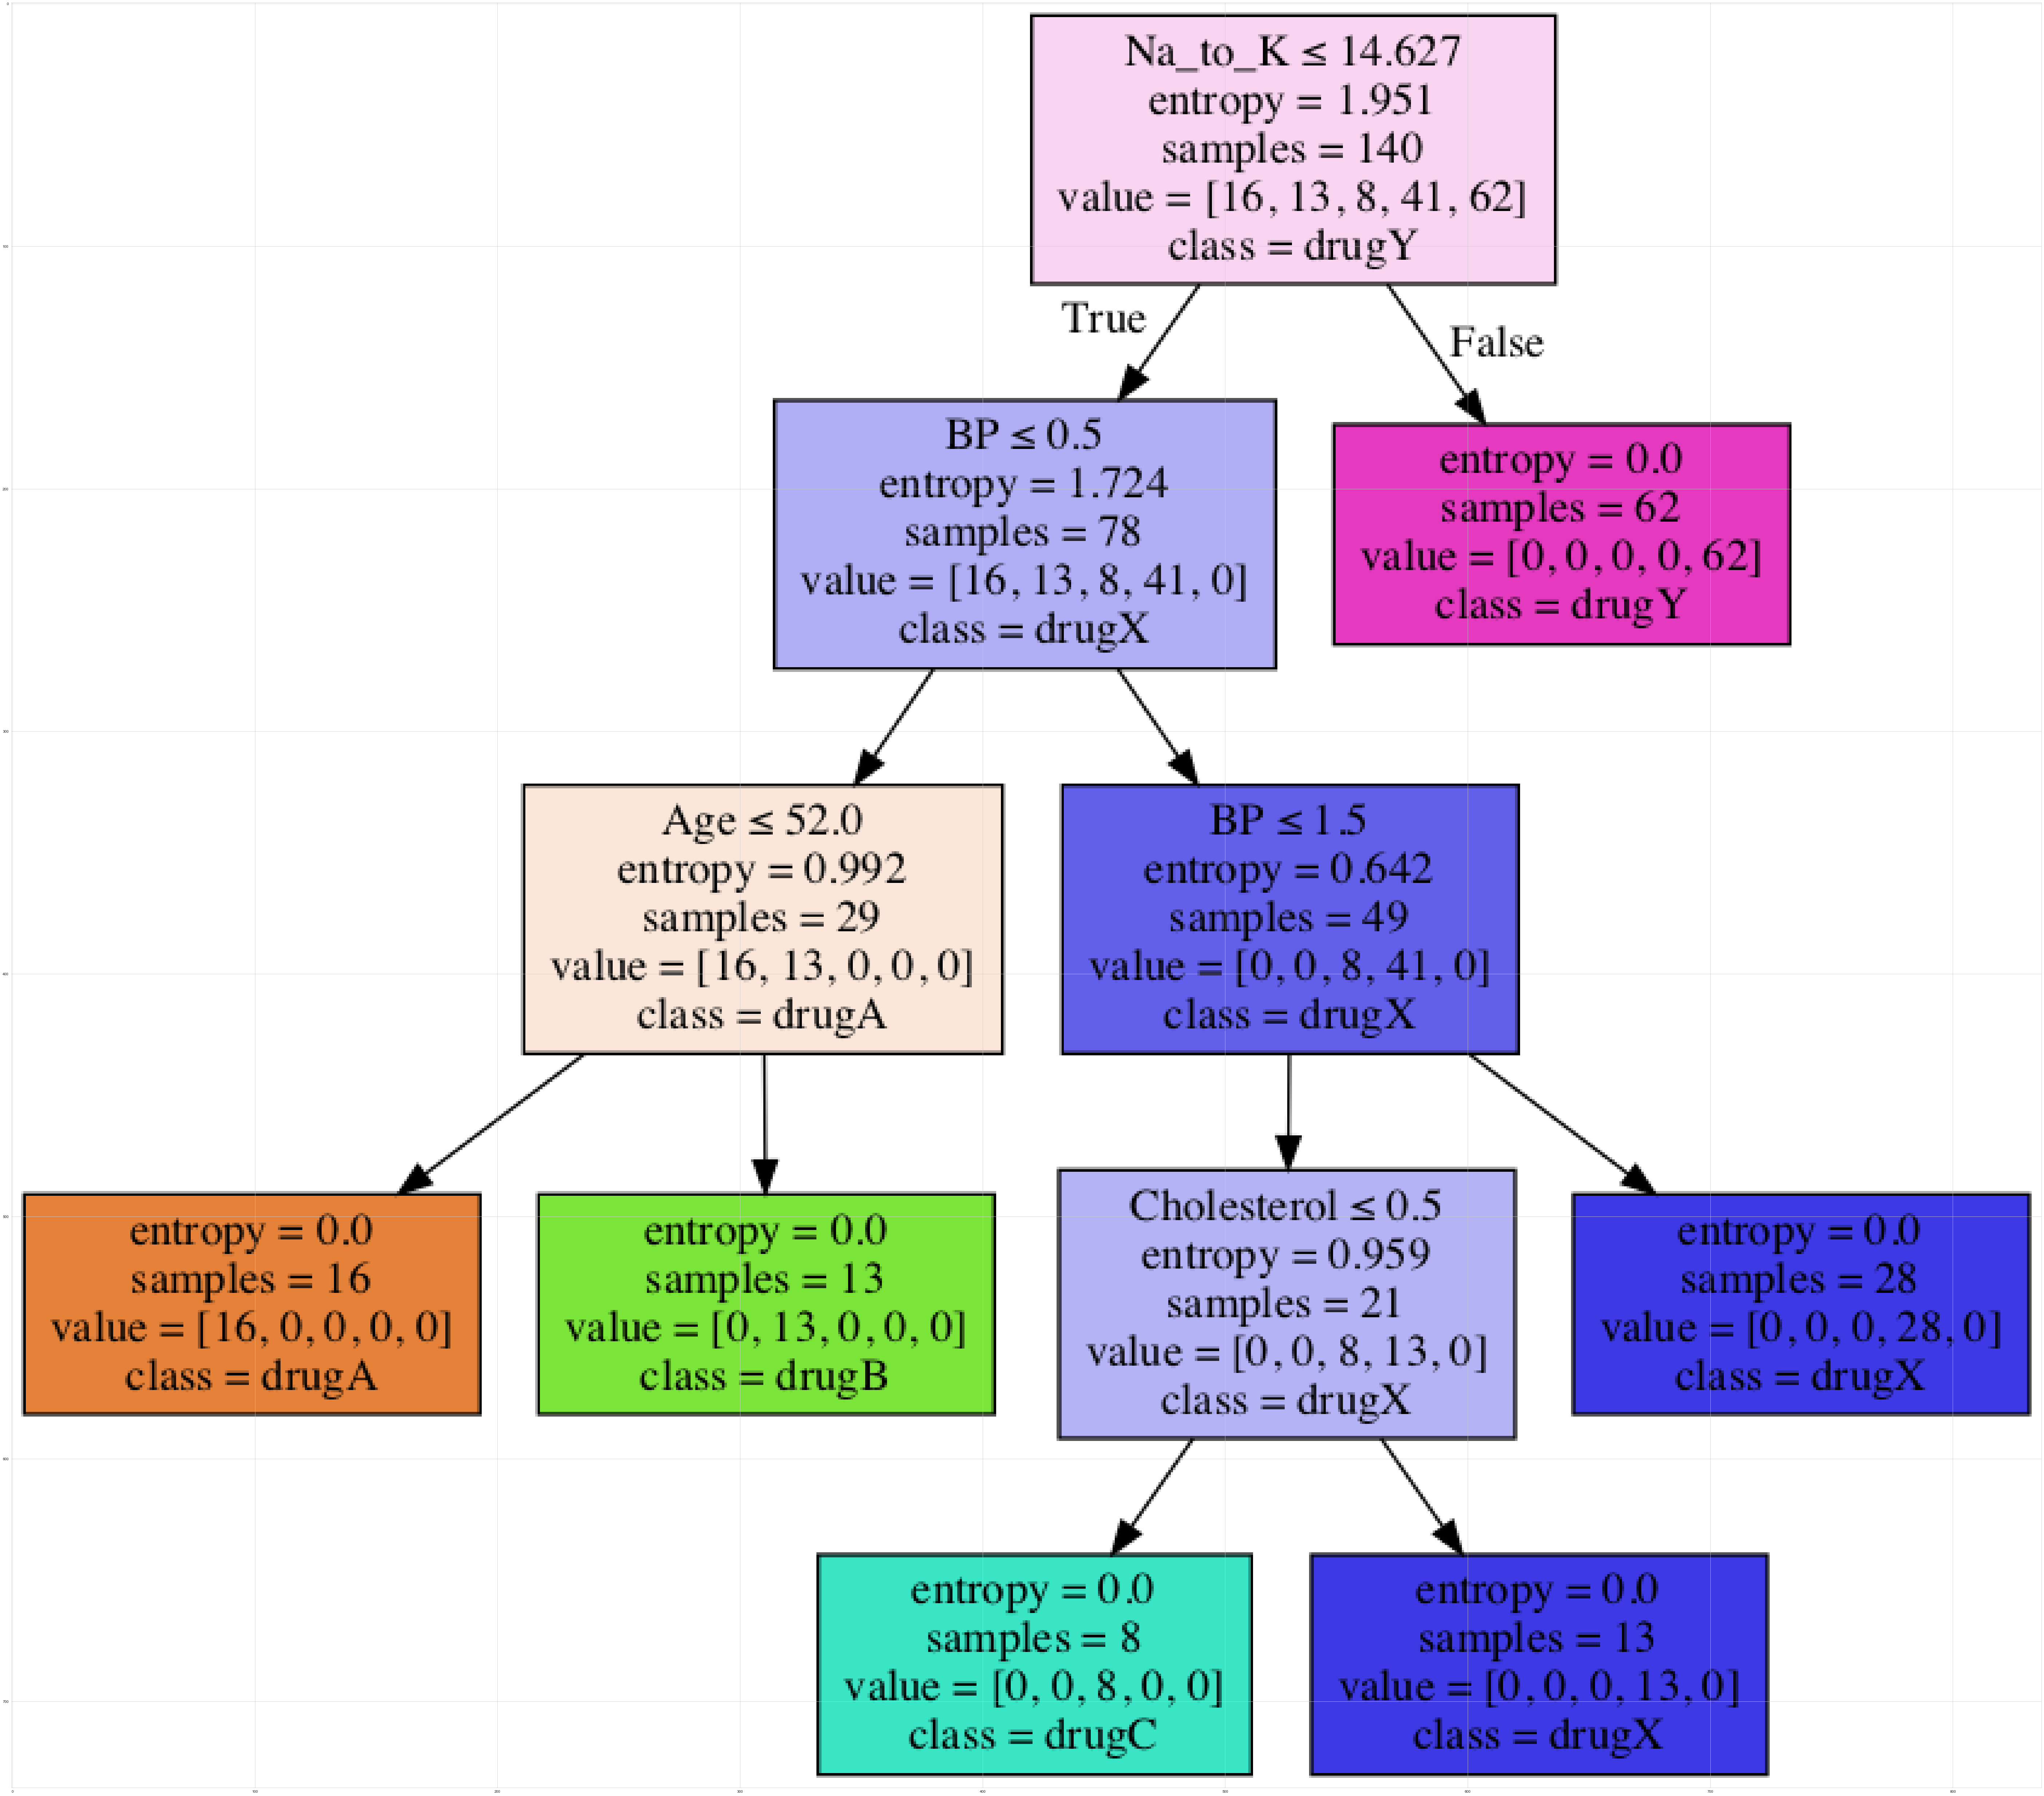

In [49]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out = tree.export_graphviz(drugTree, feature_names=featureNames, out_file=dot_data, class_names = np.unique(y_train), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

# Result

In this project, model-1, i.e, Decision Tree Classifier is more suitable with an accuracy score of 96.67%.